In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

sys.path.insert(0, os.path.abspath('..'))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
layers = keras.layers
mnist = keras.datasets.mnist
import tensorflow_probability as tfp
tfd = tfp.distributions

from recast.distributions import *
from recast.etas import *
from recast.model import *

sns.set_style('whitegrid')

       time  magnitude  parent
0  0.381470   0.169654     0.0
1  1.922846   1.266921     0.0
2  1.922849   1.356973     1.0
3  1.925762   0.123237     1.0
4  2.411604   0.441560     0.0
             time  magnitude   parent
5767   2440.26000   5.100138   5648.0
29010  8762.24500   4.848513  29005.0
29847  8762.24500   3.804613  29010.0
15886  3633.52780   3.700546  15885.0
790     351.18222   3.700305    786.0


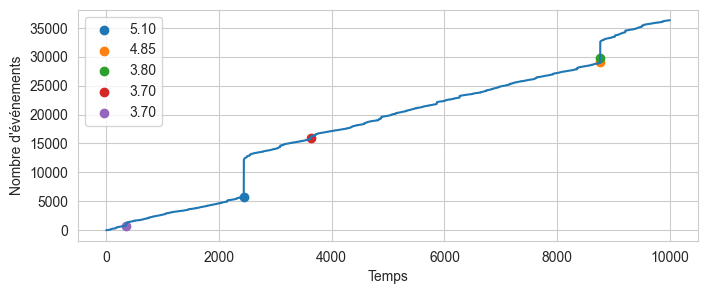

In [30]:
seq = etas(engine='rust', t_end=10000)
df = pd.DataFrame(seq, columns=['time', 'magnitude', 'parent'])
print(df.head())
plt.figure(figsize=(8, 3))
high_mags = df.magnitude.sort_values(ascending=False).index[:5]
print(df.iloc[high_mags])
plt.plot(df.time, df.index + 1)
for idx in high_mags:
    time = df.time.iloc[idx]
    magnitude = df.magnitude.iloc[idx]
    plt.scatter(time, idx + 1, label=f'{magnitude:.2f}')
plt.legend()
plt.xlabel('Temps')
plt.ylabel('Nombre d\'événements')
plt.savefig('../images/beamer/seq.png', dpi=200, bbox_inches='tight')
plt.show()